In [ ]:
df <- read.csv('howpop_train.csv')

In [ ]:
library(anytime)
mydate = anytime(df$published)

In [ ]:
mydate = as.POSIXlt(mydate)

In [ ]:
str(mydate)

 POSIXlt[1:134137], format: "2008-01-01 18:19:00" "2008-01-01 18:30:00" "2008-01-01 18:34:00" ...


In [ ]:
df$year = as.numeric(format(mydate, "%Y"))
df$month = as.numeric(format(mydate, "%m"))
df$day = as.numeric(format(mydate, "%d"))
df$hour = as.numeric(format(mydate, "%H"))
df$weekday = weekdays(mydate, abbreviate = F)

In [ ]:
str(df)

'data.frame':	134137 obs. of  22 variables:
 $ url             : Factor w/ 134137 levels "https://geektimes.ru/company/1cloud/blog/240716/",..: 92679 92683 92684 92686 12698 92695 12702 92724 121835 92728 ...
 $ domain          : Factor w/ 2 levels "geektimes.ru",..: 2 2 2 2 1 2 1 2 2 2 ...
 $ post_id         : int  18284 18285 18286 18291 18294 18295 18306 18311 31352 18314 ...
 $ published       : Factor w/ 130291 levels "2008-01-01 18:19:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ author          : Factor w/ 22078 levels "","@0000168",..: 18691 5005 5005 18689 4862 11582 293 1620 10787 11582 ...
 $ flow            : Factor w/ 7 levels "","admin","design",..: 4 3 3 3 1 4 1 7 4 4 ...
 $ polling         : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ content_len     : int  4305 7344 8431 5662 3706 3171 435 3291 1953 3712 ...
 $ title           : Factor w/ 133628 levels " "," — а я вчера пересматривал «Доктора Хауса» на своем окне!",..: 84422 120779 120779 113817 100727 22746 22

1. В каком месяце (и какого года) было больше всего публикаций?

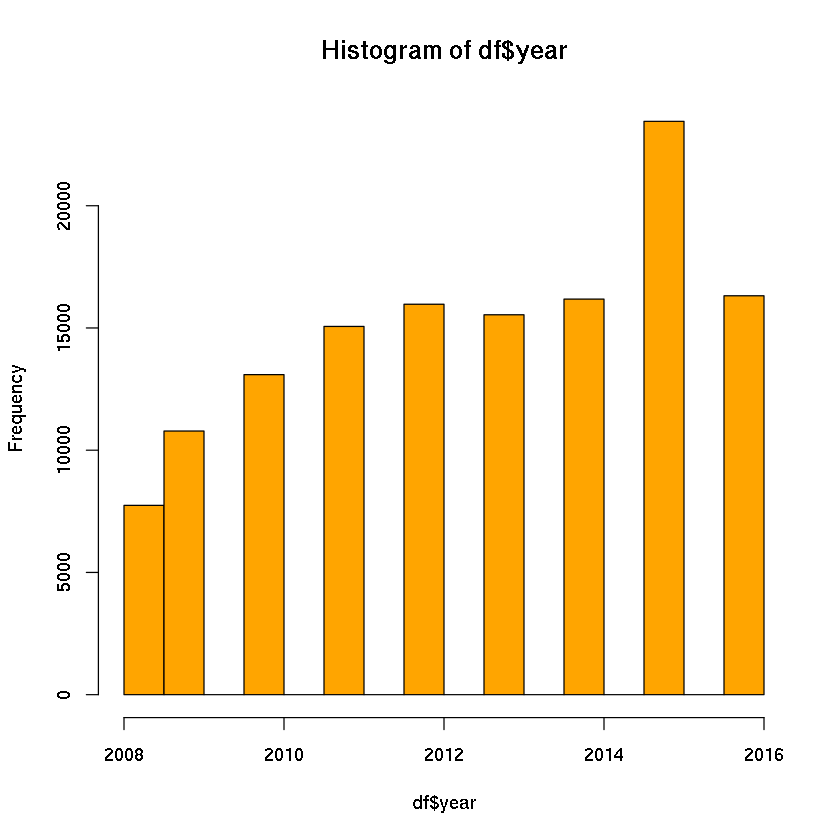

In [ ]:
hist(df$year, col='orange')

По гистограмме видим, что самый популярный год - 2015

In [ ]:
df_2015 <- subset(df, df$year == 2015, select = c('month', 'title', 'day', 'hour', 'domain', 'weekday'))

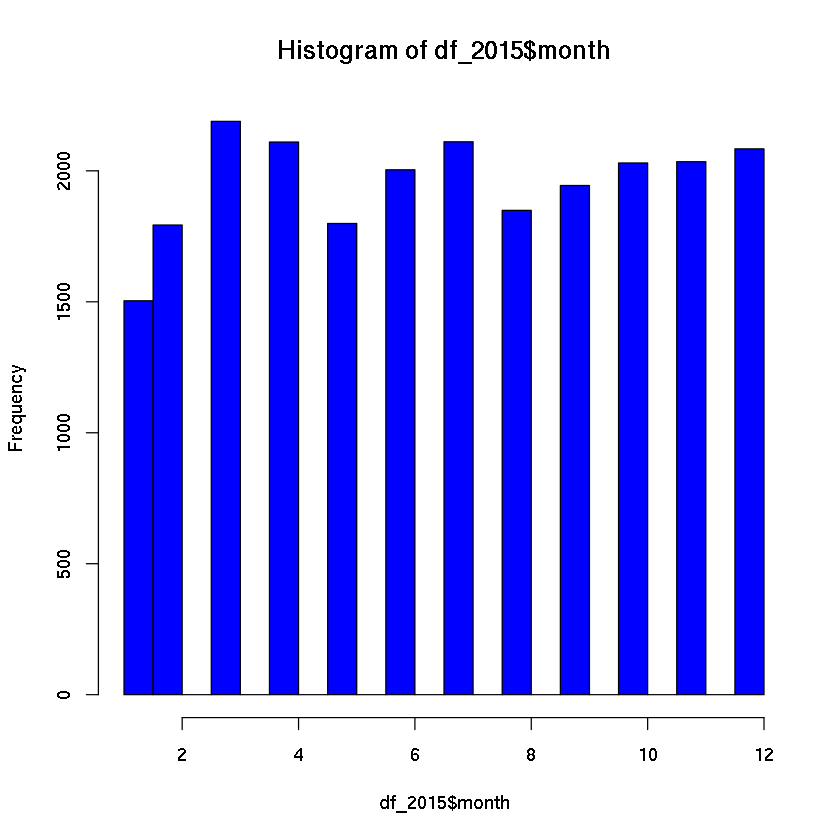

In [ ]:
hist(df_2015$month, col='blue')

Больше всего записей в 2015 году в марте


2. Проанализируйте публикации в месяце из предыдущего вопроса

In [ ]:
df_2015_03 <- subset(df_2015, df_2015$month == 3, select = c('month', 'title', 'day', 'hour', 'domain', 'weekday'))

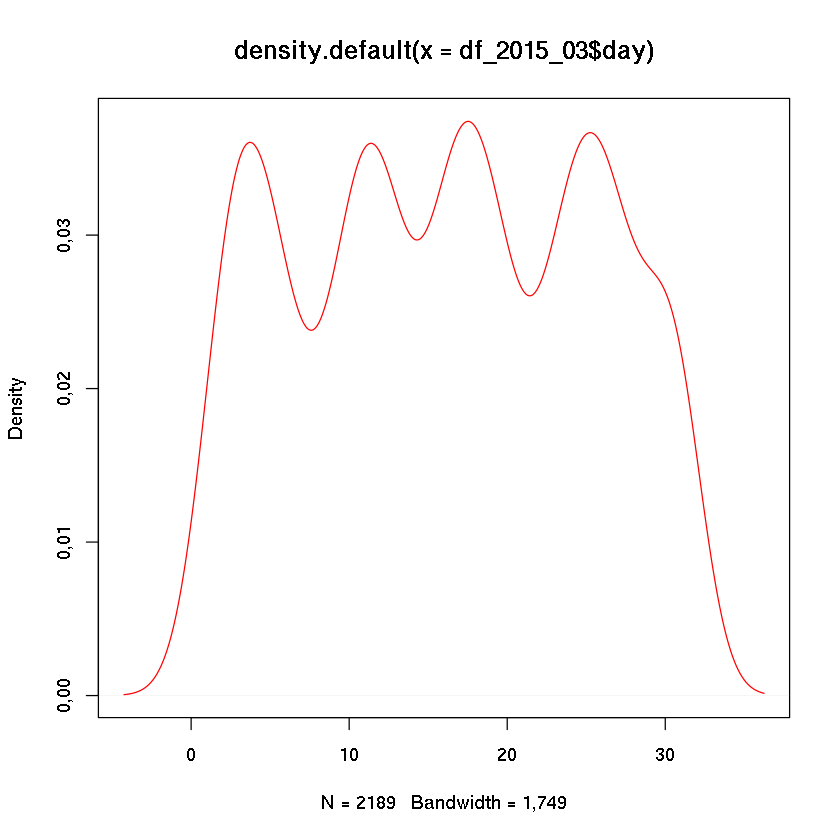

In [ ]:
d <- density(df_2015_03$day)
plot(d, col='red')

In [ ]:
head(df_2015_03)

,month,title,day,hour,domain,weekday
97667,3,Введение в разработку слайд-шоу на JavaScript,1,0,habrahabr.ru,Sunday
97668,3,Дайджест KolibriOS #7: как мы зиму перезимовали,1,0,habrahabr.ru,Sunday
97669,3,"9 марта компания Apple сделает то, что не делала в течение последних 5 лет",1,7,habrahabr.ru,Sunday
97670,3,Context Model Pattern via Aero Framework,1,7,habrahabr.ru,Sunday
97671,3,Заполнение текстовых шаблонов данными на основе модели. Реализация на .NET с использованием динамических функций в байт-коде (IL),1,10,habrahabr.ru,Sunday
97672,3,Философия программирования 5 — Колибри и Реактос,1,12,habrahabr.ru,Sunday


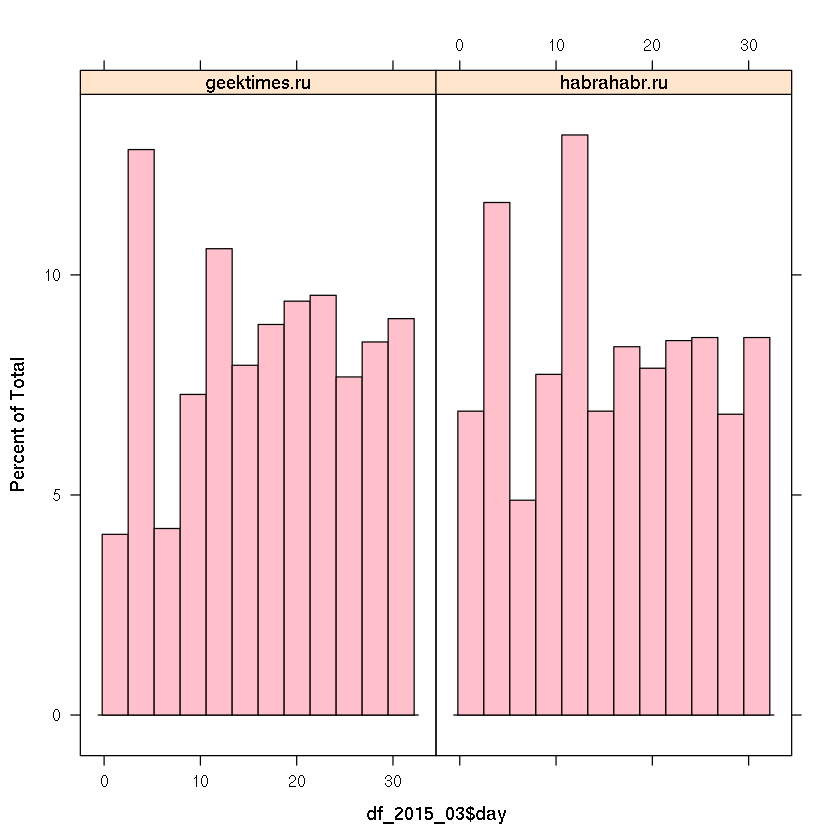

In [ ]:
library(lattice)
histogram( ~ df_2015_03$day | df_2015_03$domain, col='pink')

Если сравнивать количество постов в день, есть дни, когда постов на гиктаймс больше, чем на хабре

In [ ]:
sats <- subset(df_2015_03, df_2015_03$weekday == 'Saturday', select = c('day', 'hour', 'domain'))

In [ ]:
unique(sats$day)

[1]  7 14 21 28

In [ ]:
table(sats$domain)['habrahabr.ru']
table(sats$domain)['geektimes.ru']

habrahabr.ru 
          58

geektimes.ru 
          57

По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей


3. Когда лучше всего публиковать статью?

In [ ]:
library(dplyr)
mean_views <- (df %>% group_by(hour) %>%
 summarise(mean = mean(views)))

In [ ]:
max(mean_views)

[1] 22024,66

In [ ]:
mean_views[mean_views['mean'] == max(mean_views), 'hour']

hour
5


In [ ]:
library(dplyr)
mean_comms <- (df %>% group_by(hour) %>%
 summarise(mean = mean(comments)))

In [ ]:
max(mean_comms)

[1] 53,93569

In [ ]:
mean_comms[mean_comms['mean'] == max(mean_comms), 'hour']

hour
4


In [ ]:
geek <- subset(df, df$domain == 'geektimes.ru', select = c('comments', 'hour', 'domain'))

In [ ]:
library(dplyr)
most_comms <- (geek %>% group_by(hour) %>%
 summarise(max = max(comments)))

In [ ]:
max(most_comms)

[1] 2266

In [ ]:
most_comms[most_comms['max'] == max(most_comms), 'hour']

hour
3


In [ ]:
habr <- subset(df, df$domain == 'habrahabr.ru', select = c('comments', 'hour', 'domain'))

In [ ]:
library(dplyr)
mean_comms_h <- (habr %>% group_by(hour) %>%
 summarise(mean = mean(comments)))

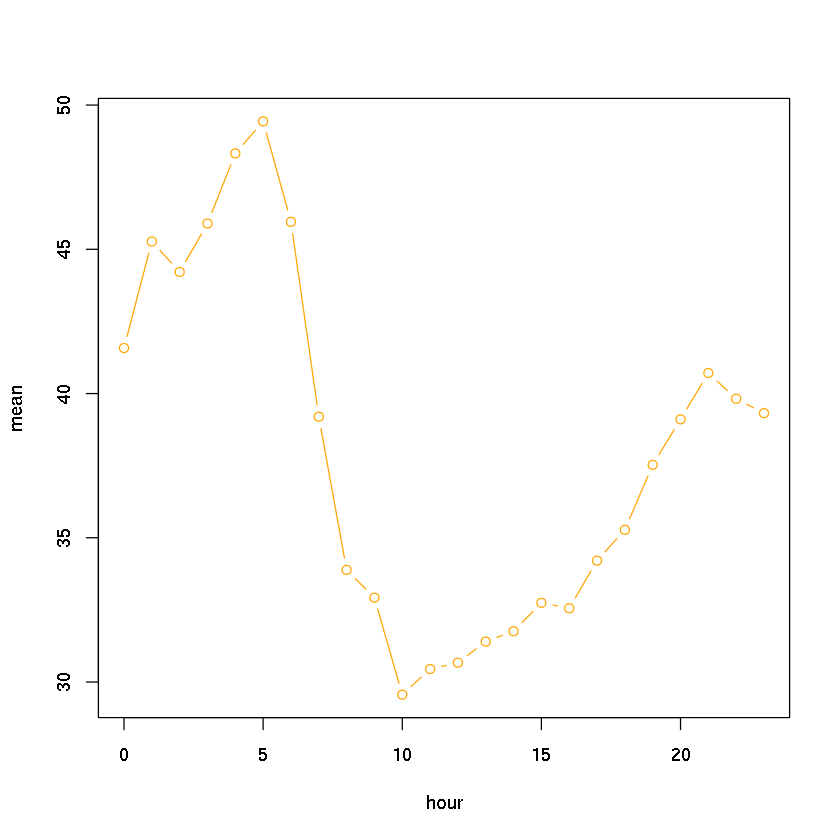

In [ ]:
plot(mean_comms_h, type='b', col='orange')

Больше всего просмотров набирают статьи, опубликованные в 6 часов утра


4. Кого из топ-20 авторов чаще всего минусуют?

In [ ]:
morda <- subset(df, df$author == '@Mordatyj', select = c('comments', 'hour', 'domain', 'votes_minus'))

In [ ]:
morda[is.na(morda)] <- 0

In [ ]:
round(mean(morda$votes_minus)) # @Mordatyj

[1] 7

In [ ]:
mithgol <- subset(df, df$author == '@Mithgol', select = c('comments', 'hour', 'domain', 'votes_minus'))

In [ ]:
mithgol[is.na(mithgol)] <- 0

In [ ]:
round(mean(mithgol$votes_minus)) # @Mithgol

[1] 20

In [ ]:
alizar <- subset(df, df$author == '@alizar', select = c('comments', 'hour', 'domain', 'votes_minus'))

In [ ]:
alizar[is.na(alizar)] <- 0

In [ ]:
round(mean(alizar$votes_minus)) # @alizar

[1] 8

In [ ]:
ilya42 <- subset(df, df$author == '@ilya42', select = c('comments', 'hour', 'domain', 'votes_minus'))

In [ ]:
ilya42[is.na(ilya42)] <- 0

In [ ]:
round(mean(ilya42$votes_minus)) # @ilya42

[1] 6

@Mithgol

5. Сравните субботы и понедельники

In [ ]:
saturdays <- subset(df, df$weekday == 'Saturday', select = c('hour'))

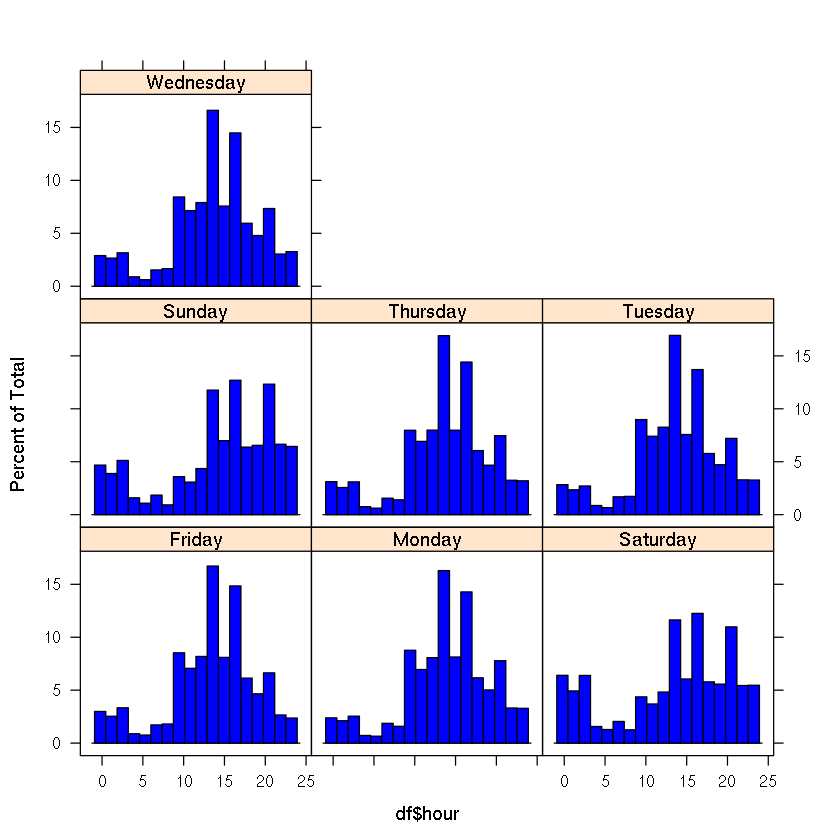

In [ ]:
library(lattice)
histogram( ~ df$hour | df$weekday, col='blue')

Не правда